In [1]:
from astropy.table import Table

import numpy as np

import sys
sys.path.insert(1, '/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/')
from dark_matter_mass_v1 import rot_fit_BB
from rotation_curve_functions import disk_bulge_vel

import matplotlib.pyplot as plt
import matplotlib
#%matplotlib notebook

#### directories and files

In [2]:
manga_folder = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/' 
master_table_fn = manga_folder + 'output_files/DR17/CURRENT_MASTER_TABLE/master_table_H_alpha_BB_HI_H2_MxCG_R90_CMD_ZPG16R_SFR_MZ_phi_HI90.fits'
master_table = Table.read(master_table_fn, format='fits')
image_dir = '/Users/nityaravi/Documents/qualifying exam/plots/'
working_table_fn = manga_folder + 'output_files/DR17/CURRENT_MASTER_TABLE/H_alpha_HIvel_BB_extinction_H2_MxCG_R90_v3p5_Z_SFR_Portsmouthflux_Zglob_HIR90.fits'
working_table = Table.read(working_table_fn, format='fits')

In [3]:
master_table[0:4]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_ID,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,smoothness_score,ba_map,ba_err_map,phi_map,phi_err_map,Vsys_map,Vsys_err_map,x0_map,x0_err_map,y0_map,y0_err_map,Vmax_map,Vmax_err_map,alpha_map,alpha_err_map,Rturn_map,Rturn_err_map,M90_map,M90_err_map,M3p5_map,M3p5_err_map,rho_bulge_map,rho_bulge_err_map,R_bulge_map,R_bulge_err_map,M90_disk_map,M90_disk_err_map,M3p5_disk_map,M3p5_disk_err_map,NSA_elpetro_th90,chi2_map,chi2_disk_map,logHI,logHI200kms,WF50,WF50_err,map_fit_flag,DL_ttype,rabsmag_NSA,R90_kpc,MaNGA_sample,CMD_class,v_3p5,v_3p5_err,logH2_M,logH2_CG,logH2_CG_err,M_Z,M_Z_err,Rmax,SFR,sSFR,SFR_err,sSFR_err,Z_PG16R_map,Z_PG16R_err_map,M_Z_map,M_Z_err_map,Z_PG16R,Z_PG16R_err,Sigma_disk_map,Sigma_disk_err_map,Rdisk_map,Rdisk_err_map,logHI_R90,logHI_R90_err
int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,448,450,51900,48157,51226,133.3710906116639,57.59842514455842,0.417013,69.2463,0.0392074,2685340000.0,1.560186343059074,0.8525269160441389,0.004661246847300842,61.88507825188626,0.07338042747869138,2.946989472970758,0.09848277794062997,38.7739389484797,0.022936739976051144,37.440940071078124,0.016138461970098106,183.15428191832711,2.8318738759310786,4.181226771589277,0.07058094055808059,2.2299464843830368,0.006099342053787376,10.637055736445056,9.856536145016422,11.185428134112588,10.663096428880776,318528356.25649077,10973819.90888883,1.1700697820493802,0.01234311518755433,10.054323200255043,8.681101900065409,10.119328135890797,8.780959524997495,9.852487564086914,10.529260284502032,10.529260284502032,10.350040435791016,-999.0,309.752973573684,50.84180796596384,1.5,6.564641952514648,-19.2112,5.614479609229095,2.0,1.0,183.14938552312165,24.91258446340628,-999.0,-999.0,-999.0,8.486220534884033,7.883433825112772,6.435441132989916,-0.02367674559354782,-9.747639656066895,0.5330458879470825,0.5682201385498047,0.0,0.0,0.0,0.0,8.421086766593023,0.036466659990572275,300.9007693953248,15.203381761428345,0.42300918794160963,0.04332889447409282,10.35003923238,1.4164926945700251e-07
10001,12702,448,524,51900,48188,51261,133.68566986867248,57.48025032183927,0.598115,12.5169,0.0408108,4642460000.0,1.5619979358006435,0.6739844282455619,0.006739656007202572,188.3088174477578,0.16826186470866497,0.6765359119793715,0.23419562301556418,36.85326879733403,0.04204024887591865,37.98221005537202,0.05640746039294769,194.97775272347383,6.932242299930594,0.6629820156636723,0.04575759010348131,0.9585752877878831,0.07208969706038451,10.600037009816079,10.15080355502181,11.292909462167833,10.847252340042417,115971867.9868961,7747575.084882941,1.6956282295929506,0.03670610210595715,10.124313484194262,9.034999166941406,10.177811159857796,9.124034282826187,14.355437278747559,2.457986344552885,2.457986344552885,9.583724021911621,-999.0,273.50491644321835,6.866128229994085,3.5,4.730921268463135,-19.0722,8.515048082090281,2.0,2.0,168.30899596736322,29.53675151629983,-999.0,-999.0,-999.0,0.0,0.0,10.492041769351301,-0.5348737239837646,-10.398966789245605,0.8455471992492676,0.8668661117553711,0.0,0.0,0.0,0.0,0.0,0.0,293.3478638373148,10.60192409708804,0.6790488070059231,0.05316399052089292,9.583723595501498,2.0408187920082256e-07
10001,12703,483,535,51924,55648,59078,136.01715996919202,57.09232917791099,0.378034,51.5052,0.0462094,9439710000.0,1.1414035570714935,0.868911357820688,0.0007131052643978732,56.79483322166177,0

In [4]:
working_table[0:4]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logMHI_90,logMHI_90_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.0835,41.292,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.69906,2.64546,2.59645,2.54039,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.66

In [5]:
CO_sample = master_table[np.logical_or(master_table['logH2_CG'] > 0, master_table['logH2_M']>0)]

In [6]:
def BB_vel(depro_radius, v_max, r_turn, alpha):

    v = v_max * (np.abs(depro_radius) / (r_turn**alpha + np.abs(depro_radius)**alpha)**(1/alpha))

    v = v*np.sign(depro_radius)

    return v

In [7]:
H2_gals = CO_sample[np.logical_and(CO_sample['M90_map'] > 0, CO_sample['M90_disk_map']>0)]
H2_gals = H2_gals[H2_gals['alpha_map'] <= 99]
H2_gals = H2_gals[H2_gals['M90_err_map'] > 0]
H2_gals = H2_gals[H2_gals['Vmax_err_map']/H2_gals['Vmax_map'] <=2]
vr90 = BB_vel(H2_gals['R90_kpc'], H2_gals['Vmax_map'], H2_gals['Rturn_map'], H2_gals['alpha_map'])
H2_gals = H2_gals[np.logical_and(vr90 > 10, vr90 < 1000)]
H2_gals = H2_gals[H2_gals['logHI'] > 0]
H2_gals = H2_gals[H2_gals['M90_map'] > 9]

In [8]:
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

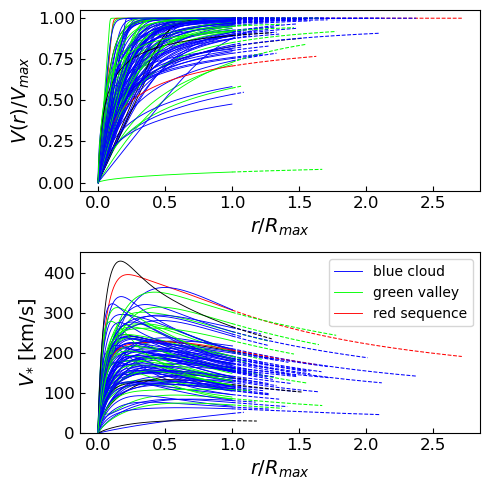

In [12]:
plt.figure(figsize=(5,5))
ax1 = plt.subplot(211)
plt.tick_params('x', labelsize=6)

plt.tick_params(direction='in', labelsize=12)
plt.ylabel(r'$V(r)/V_{max}$', fontsize=14)

plt.xlabel(r'$r/R_{max}$', fontsize=14)

colors = {'1':'b',
          '2': 'lime',
          '3': 'r',
          '-99': 'k'}

labels = {'1': 'blue cloud',
          '2': 'green valley',
           '3': 'red sequence',
         '-99': 'none'}

for i in range(len(H2_gals)):
    
    R90 = H2_gals['R90_kpc'][i]
    Rmax = H2_gals['Rmax'][i]
    Rmax_range = np.linspace(0,Rmax,10000)
    vRmax = BB_vel(Rmax_range, H2_gals['Vmax_map'][i], H2_gals['Rturn_map'][i], H2_gals['alpha_map'][i])
    plt.plot(Rmax_range/H2_gals['Rmax'][i], vRmax/H2_gals['Vmax_map'][i], 
             color=colors[str(int(H2_gals['CMD_class'][i]))], linestyle='-',
             linewidth=0.65,label=labels[str(int(H2_gals['CMD_class'][i]))])
    
    if R90 > Rmax:
        R90_range = np.linspace(Rmax, R90,10000)
        vR90 = BB_vel(R90_range, H2_gals['Vmax_map'][i], H2_gals['Rturn_map'][i], H2_gals['alpha_map'][i])
        plt.plot(R90_range/H2_gals['Rmax'][i], vR90/H2_gals['Vmax_map'][i], 
                 color=colors[str(int(H2_gals['CMD_class'][i]))], linestyle='--',linewidth=0.75)
    
plt.tick_params('x', 
                #labelbottom=False
               )

# share x only
ax2 = plt.subplot(212, 
                  #sharex=ax1
                 )

plt.xlabel(r'$r/R_{max}$', fontsize=14)
plt.ylabel(r'$V_{*}$ [km/s]', fontsize=14)
plt.tick_params(direction='in', labelsize=12)

for i in range(len(H2_gals)):
    R90 = H2_gals['R90_kpc'][i]
    Rmax = H2_gals['Rmax'][i]
    Rmax_range = np.linspace(0,Rmax,10000)
    
    vRmax = disk_bulge_vel(Rmax_range, H2_gals['Sigma_disk_map'][i], H2_gals['Rdisk_map'][i], 
                            H2_gals['rho_bulge_map'][i], H2_gals['R_bulge_map'][i])
    plt.plot(Rmax_range/H2_gals['Rmax'][i], vRmax,
             color=colors[str(int(H2_gals['CMD_class'][i]))], 
             linestyle='-',linewidth=0.65,label=labels[str(int(H2_gals['CMD_class'][i]))])
    
    if R90 > Rmax:
        R90_range = np.linspace(Rmax, R90,10000)
        vR90 = disk_bulge_vel(R90_range, H2_gals['Sigma_disk_map'][i], H2_gals['Rdisk_map'][i], 
                            H2_gals['rho_bulge_map'][i], H2_gals['R_bulge_map'][i])
        plt.plot(R90_range/H2_gals['Rmax'][i], vR90,
                 color=colors[str(int(H2_gals['CMD_class'][i]))], linestyle='--',linewidth=0.75)

# make these tick labels invisible


plt.tight_layout()
plt.ylim(bottom=0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
order=[0,2,1]
plt.legend(([by_label['blue cloud'], by_label['green valley'], by_label['red sequence']]), 
               (['blue cloud','green valley','red sequence']))
#plt.subplots_adjust(hspace=.0)

plt.savefig(image_dir + 'H2_rot_curve.eps')

plt.show()
plt.close()

/Users/nityaravi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/Users/nityaravi/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


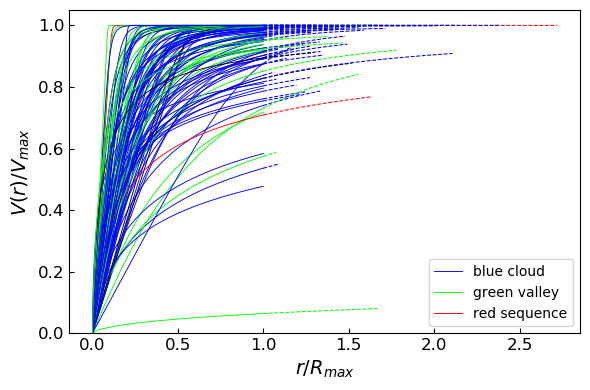

In [13]:

plt.tick_params('x', labelsize=6)

plt.tick_params(direction='in', labelsize=12)
plt.ylabel(r'$V(r)/V_{max}$', fontsize=14)

plt.xlabel(r'$r/R_{max}$', fontsize=14)

colors = {'1':'b',
          '2': 'lime',
          '3': 'r',
          '-99': 'k'}

labels = {'1': 'blue cloud',
          '2': 'green valley',
           '3': 'red sequence',
         '-99': 'none'}

for i in range(len(H2_gals)):
    
    R90 = H2_gals['R90_kpc'][i]
    Rmax = H2_gals['Rmax'][i]
    Rmax_range = np.linspace(0,Rmax,10000)
    vRmax = BB_vel(Rmax_range, H2_gals['Vmax_map'][i], H2_gals['Rturn_map'][i], H2_gals['alpha_map'][i])
    plt.plot(Rmax_range/H2_gals['Rmax'][i], vRmax/H2_gals['Vmax_map'][i], 
             color=colors[str(int(H2_gals['CMD_class'][i]))], linestyle='-',
             linewidth=0.65,label=labels[str(int(H2_gals['CMD_class'][i]))])
    
    if R90 > Rmax:
        R90_range = np.linspace(Rmax, R90,10000)
        vR90 = BB_vel(R90_range, H2_gals['Vmax_map'][i], H2_gals['Rturn_map'][i], H2_gals['alpha_map'][i])
        plt.plot(R90_range/H2_gals['Rmax'][i], vR90/H2_gals['Vmax_map'][i], 
                 color=colors[str(int(H2_gals['CMD_class'][i]))], linestyle='--',linewidth=0.75)

plt.tight_layout()
plt.ylim(bottom=0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
order=[0,2,1]
plt.legend(([by_label['blue cloud'], by_label['green valley'], by_label['red sequence']]), 
               (['blue cloud','green valley','red sequence']))
#plt.subplots_adjust(hspace=.0)

plt.savefig(image_dir + 'mtot_rot_curve.eps')

plt.show()
plt.close()

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

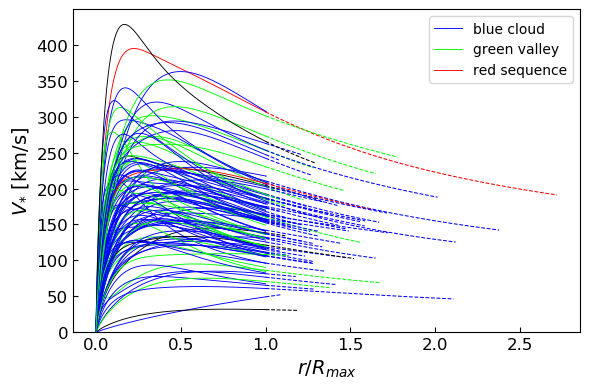

In [15]:
plt.xlabel(r'$r/R_{max}$', fontsize=14)
plt.ylabel(r'$V_{*}$ [km/s]', fontsize=14)
plt.tick_params(direction='in', labelsize=12)

colors = {'1':'b',
          '2': 'lime',
          '3': 'r',
          '-99': 'k'}

labels = {'1': 'blue cloud',
          '2': 'green valley',
           '3': 'red sequence',
         '-99': 'none'}

for i in range(len(H2_gals)):
    R90 = H2_gals['R90_kpc'][i]
    Rmax = H2_gals['Rmax'][i]
    Rmax_range = np.linspace(0,Rmax,10000)
    
    vRmax = disk_bulge_vel(Rmax_range, H2_gals['Sigma_disk_map'][i], H2_gals['Rdisk_map'][i], 
                            H2_gals['rho_bulge_map'][i], H2_gals['R_bulge_map'][i])
    plt.plot(Rmax_range/H2_gals['Rmax'][i], vRmax,
             color=colors[str(int(H2_gals['CMD_class'][i]))], 
             linestyle='-',linewidth=0.65,label=labels[str(int(H2_gals['CMD_class'][i]))])
    
    if R90 > Rmax:
        R90_range = np.linspace(Rmax, R90,10000)
        vR90 = disk_bulge_vel(R90_range, H2_gals['Sigma_disk_map'][i], H2_gals['Rdisk_map'][i], 
                            H2_gals['rho_bulge_map'][i], H2_gals['R_bulge_map'][i])
        plt.plot(R90_range/H2_gals['Rmax'][i], vR90,
                 color=colors[str(int(H2_gals['CMD_class'][i]))], linestyle='--',linewidth=0.75)

# make these tick labels invisible


plt.tight_layout()
plt.ylim(bottom=0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
order=[0,2,1]
plt.legend(([by_label['blue cloud'], by_label['green valley'], by_label['red sequence']]), 
               (['blue cloud','green valley','red sequence']))
#plt.subplots_adjust(hspace=.0)

plt.savefig(image_dir + 'mstar_rot_curve.eps')

plt.show()
plt.close()

In [28]:
labels

['blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'none',
 'blue cloud',
 'red sequence',
 'blue cloud',
 'none',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'none',
 'blue cloud',
 'blue cloud',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'green valley',
 'green valley',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'blue cloud',
 'green valley',
 'green valley',
 'green valley',
 'blue cloud',
 'blue cloud',
 'green v

IndexError: list index out of range

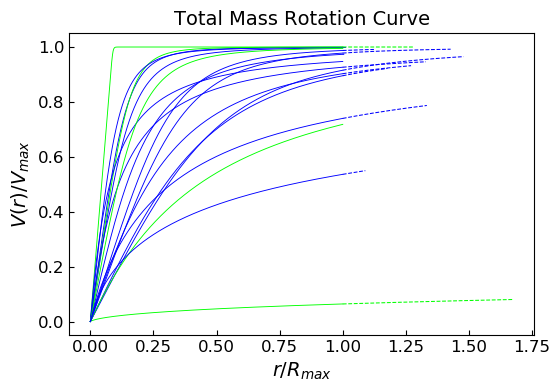

In [9]:



plt.title('Total Mass Rotation Curve', fontsize=14)
plt.tick_params(direction='in', labelsize=12)
plt.xlabel(r'$r/R_{max}$', fontsize=14)
plt.ylabel(r'$V(r)/V_{max}$', fontsize=14)

sample = ['b','lime','r','k']
labels = {'1':'blue cloud', 
          '2':'green valley',
          '3': 'red sequence'}
for i in range(len(H2_gals)):
    color = sample[int(H2_gals['CMD_class'][i])-1]
    label = labels[str(int(H2_gals['CMD_class'][i]))]
    R90 = H2_gals['R90_kpc'][i]
    Rmax = H2_gals['Rmax'][i]
    Rmax_range = np.linspace(0,Rmax,10000)
    vRmax = BB_vel(Rmax_range, H2_gals['Vmax_map'][i], H2_gals['Rturn_map'][i], H2_gals['alpha_map'][i])
    plt.plot(Rmax_range/H2_gals['Rmax'][i], vRmax/H2_gals['Vmax_map'][i], color=color, linestyle='-',linewidth=0.65,label=label)
    
    if R90 > Rmax:
        R90_range = np.linspace(Rmax, R90,10000)
        vR90 = BB_vel(R90_range, H2_gals['Vmax_map'][i], H2_gals['Rturn_map'][i], H2_gals['alpha_map'][i])
        plt.plot(R90_range/H2_gals['Rmax'][i], vR90/H2_gals['Vmax_map'][i], color=color, linestyle='--',linewidth=0.75)
        
plt.tight_layout()
plt.ylim(bottom=0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
order=[0,2,1]
plt.legend(([by_label['blue cloud'], by_label['green valley'], by_label['red sequence']]), 
               (['blue cloud','green valley','red sequence']))
plt.savefig(image_dir + 'H2_rot_curve.eps')
plt.show()
plt.close()


/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:388: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/rotation_curve_functions.py:379: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
/Users/nityaravi/Documents/Gi

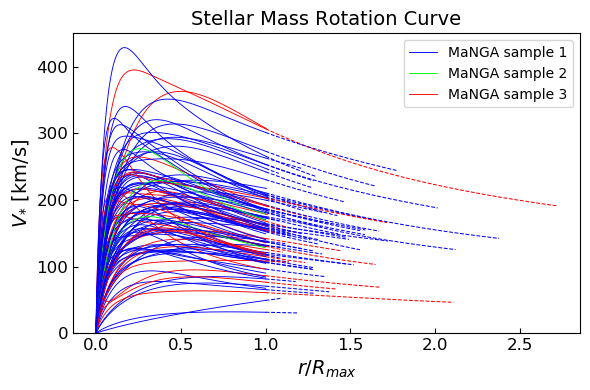

In [27]:
plt.title('Stellar Mass Rotation Curve', fontsize=14)
plt.xlabel(r'$r/R_{max}$', fontsize=14)
plt.ylabel(r'$V_{*}$ [km/s]', fontsize=14)
sample = ['b','lime','r']
labels = {'1':'MaNGA sample 1', 
          '2':'MaNGA sample 2',
          '3': 'MaNGA sample 3'}
plt.tick_params(direction='in', labelsize=12)

for i in range(len(H2_gals)):
    color = sample[int(H2_gals['MaNGA_sample'][i])-1]
    label = labels[str(int(H2_gals['MaNGA_sample'][i]))]
    R90 = H2_gals['R90_kpc'][i]
    Rmax = H2_gals['Rmax'][i]
    Rmax_range = np.linspace(0,Rmax,10000)
    
    vRmax = disk_bulge_vel(Rmax_range, H2_gals['Sigma_disk_map'][i], H2_gals['Rdisk_map'][i], 
                            H2_gals['rho_bulge_map'][i], H2_gals['R_bulge_map'][i])
    plt.plot(Rmax_range/H2_gals['Rmax'][i], vRmax, color=color, linestyle='-',linewidth=0.65,label=label)
    
    if R90 > Rmax:
        R90_range = np.linspace(Rmax, R90,10000)
        vR90 = disk_bulge_vel(R90_range, H2_gals['Sigma_disk_map'][i], H2_gals['Rdisk_map'][i], 
                            H2_gals['rho_bulge_map'][i], H2_gals['R_bulge_map'][i])
        plt.plot(R90_range/H2_gals['Rmax'][i], vR90, color=color, linestyle='--',linewidth=0.75)
        
plt.tight_layout()
plt.ylim(bottom=0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
order=[0,2,1]
plt.legend(([by_label['MaNGA sample 1'], by_label['MaNGA sample 2'], by_label['MaNGA sample 3']]), 
               (['MaNGA sample 1','MaNGA sample 2','MaNGA sample 3']))
plt.savefig(image_dir + 'H2_disk_rot_curve.eps')
plt.show()
plt.close()

In [5]:
CO_sample = master_table[np.logical_or(master_table['logH2_CG'] > 0, master_table['logH2_M']>0)]

In [8]:
xCG_fn = manga_folder + 'xCOLDGASS_PubCat.fits'
xCG = Table.read(xCG_fn, format='fits')

In [9]:
xCG

ID,SDSS,OBJID,SPECOBJID,PLATEID,MJD,FIBERID,RA,DEC,Z_SDSS,LUMDIST,INCL,NUVR,R50KPC,LOGMSTAR,LOGMUST,CINDX,WEIGHT,LOGSFR_MPAJHU,LOGSFR_SED,LOGSFR_BEST,LOGSFR_ERR,FLAG_IRAS,LOGLIR_IRAS,IRCOL_IRAS,N2HA,O3HB,AGNCLASS,Z_PP04_N2,Z_PP04_O3N2,Z_MZR,FLAG_CO,XCO,XCO_A17,XCO_A17_ERR,ICO,ICO_ERR,ICO_COR,ICO_COR_ERR,LCO,LCO_ERR,LCO_COR,LCO_COR_ERR,RMS_CO,SN_CO,WCO,WCO_FLAG,Z_CO,WCO_TFR,WCO_TFR_ERR,LOGMH2,LOGMH2_ERR,LIM_LOGMH2,LOGMH2MS,FLAG_CO21,ICO21,ICO21_ERR,LCO21,LCO21_ERR,RMS_CO21,SN_CO21,WCO21,WCO21_FLAG,Z_CO21,FLAG_APEX,ICO_APEX,LCO_APEX,RMS_APEX,SN_APEX,WCO_APEX,ZCO_APEX
int32,bytes19,int64,int64,int16,int32,int16,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32
11956,J000820.76+150921.6,587730774426517654,211893600290603008,752,52251,350,2.08654,15.15601,0.03951000049710274,174.32053,71.929924,3.04,2.424531,10.088,8.551946,2.15,0.72500116,-0.1361199,-0.047309548,-0.3246407,0.17766005,0,0.0,0.0,-0.46722433,-0.44700655,1,8.663952,8.72353,8.703835,2,4.35,3.6728113,1.3953986,0.0,0.0,0.0,0.0,97759880.0,0.0,104884690.0,0.0,0.0009518,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.585711,-1.5022897,1,0.587,0.1563711,80793976.0,21522732.0,0.001411,5.6829386,248.44264,1,0.03951,1,0.472,329046080.0,0.001424,4.6914744,242.66719,0.03949652
12025,J001934.54+161215.0,588290882176155793,212174997840461824,753,52233,322,4.89396,16.20418,0.036649998277425766,161.36345,23.075378,5.93,2.8536575,10.843,9.1912565,3.03,0.42444098,-1.42773,-1.1904594,-0.6816025,0.38218576,0,0.0,0.0,0.15814236,0.43817183,3,9.723805,8.64039,8.777737,2,4.35,2.858469,1.0860083,0.0,0.0,0.0,0.0,96599730.0,0.0,112287190.0,0.0,0.001065,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.506464,-2.3365366,2,0.0,--,--,--,0.001238,0.0,0.0,0,0.03665,0,0.0,0.0,0.0,0.0,0.0,0.0
12002,J002504.00+145815.2,588290880566132751,212174996984823808,753,52233,118,6.2667,14.97091,0.036720000207424164,161.67998,64.93981,6.25,1.3200389,10.482,9.471928,3.17,0.6425136,-1.46497,-1.7188811,-1.8846257,0.0,0,0.0,0.0,--,0.1420766,-1,--,--,8.764267,2,4.35,3.0060387,1.142074,0.0,0.0,0.0,0.0,107261620.0,0.0,111313170.0,0.0,0.001178,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.524541,-1.9574592,2,0.0,--,--,--,0.001459,0.0,0.0,0,0.03672,0,0.0,0.0,0.0,0.0,0.0,0.0
11989,J002558.89+135545.8,587730772817739967,212174996687028224,753,52233,47,6.49538,13.9294,0.04193999990820885,185.37039,24.209797,5.79,2.2019703,10.693,9.252719,3.02,0.5257021,-1.33837,-0.85873634,-1.4376403,0.7830497,0,0.0,0.0,0.08745044,0.34277308,3,9.557374,8.648296,8.7776985,2,4.35,2.8588707,1.0861609,0.0,0.0,0.0,0.0,110917610.0,0.0,120100104.0,0.0,0.001066,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.535738,-2.1572618,2,0.0,--,--,--,0.002145,0.0,0.0,0,0.04194,0,0.0,0.0,0.0,0.0,0.0,0.0
27167,J003921.66+142811.5,587724232100741195,0,418,51884,150,9.84028,14.46986,0.038019999861717224,167.56366,44.72357,4.48,1.6209953,10.372,9.20843,2.77,0.8002016,-0.9636899,-0.18055098,-0.7990457,0.35271347,0,0.0,0.0,-0.1307787,0.38306263,3,9.125353,8.56557,8.751667,2,4.35,3.1509695,1.197137,0.0,0.0,0.0,0.0,99582220.0,0.0,104773270.0,0.0,0.001172,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.518695,-1.8533051,2,0.0,--,56751584.0,inf,0.002041,0.0,245.54123,1,0.03802,0,0.0,0.0,0.0,0.0,0.0,0.0
3189,J004023.48+143649.4,587724198275645522,118160835141959680,419,51879,308,10.09787,14.61375,0.03840000182390213,169.28555,61.890377,2.77,4.5364037,10.046,7.990065,1.96,0.72500116,-0.4152899,0.53980285,0.3740583,0.0,0,0.0,0.0,-0.47638032,--,0,8.654295,--,8.695103,1,4.35,4.5325828,1.7220486,0.531,0.09825245,0.6518685,0.15527223,219285940.0,49810980.0,269200740.0,64122440.0,0.001235,5.9935975,238.5777,2,0.0383

In [10]:
nsa = Table.read('/Users/nityaravi/Documents/Research/RotationCurves/data/nsa_v1_0_1.fits', format='fits')
nsa

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY [7],SERSIC_NMGY_IVAR [7],SERSIC_OK,SERSIC_RNMGY [7],SERSIC_ABSMAG [7],SERSIC_AMIVAR [7],EXTINCTION [7],SERSIC_KCORRECT [7],SERSIC_KCOEFF [5],SERSIC_MTOL [7],SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETRO_FLUX [7],PETRO_FLUX_IVAR [7],FIBER_FLUX [7],FIBER_FLUX_IVAR [7],PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX [7],SERSIC_FLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX [7],ELPETRO_FLUX_IVAR [7],ELPETRO_TH50 [7],ELPETRO_TH90 [7],ELPETRO_APCORR_R,ELPETRO_APCORR [7],ELPETRO_APCORR_SELF [7],ELPETRO_NMGY [7],ELPETRO_NMGY_IVAR [7],ELPETRO_OK,ELPETRO_RNMGY [7],ELPETRO_ABSMAG [7],ELPETRO_AMIVAR [7],ELPETRO_KCORRECT [7],ELPETRO_KCOEFF [5],ELPETRO_MASS,ELPETRO_MTOL [7],ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,int32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,28.661283 .. 2337.7668,-15.124495 .. -19.915525,293.50247 .. 1094.6666,-0.010805 .. 0.009306902,3.9630737e-05 .. 2.6251464e-06,6833158000.0,0.00017553588 .. 1.14686,0.004447123,0.09061434,0.025269886,0.0
J094630.85-004554.5,09h/m00/J094630.85-004554.5,146.6285851269414,-0.7651620976591762,1,-1,-1,-1,-1,-1,17.318521,0.06465632,sdss,0.06491773,1239,2,175,301,735.56384,1277.3636,1,0.06403577,2.4606192 .. 443.66675,5.447516 .. 0.006137319,1,2.6

In [39]:
nsa_dict = {}
for i in range(len(nsa)):
    plate = nsa['PLATE'][i]
    fiberid = nsa['FIBERID'][i]
    #mjd = nsa['MJD'][i]
    
    nsa_dict[(plate, fiberid)]=i

In [40]:
rabsmag = np.zeros(len(xCG))
for i in range(len(xCG)):
    plate = xCG['PLATEID'][i]
    fiberid = xCG['FIBERID'][i]
    #mjd = xCG['MJD'][i]
    try:
        i_nsa = nsa_dict[(plate, fiberid)]
    except:
        continue
    
    rabsmag[i] = nsa['ELPETRO_ABSMAG'][i_nsa][4]
    

In [42]:
rabsmag

array([-19.25423431, -20.53291702, -19.82305908, -20.41121674,
         0.        , -19.78111267, -19.929739  , -20.16612816,
       -19.89636803, -19.35845566, -19.71334648, -20.57976532,
       -19.69483376, -20.63027573, -20.10983658, -20.84527397,
       -21.13157463, -19.8842659 , -20.30851364, -20.68081856,
       -21.0434494 , -20.05877304, -20.68371773, -21.05140686,
       -20.19356346, -19.88828468, -19.13060188, -21.67072105,
       -20.55700111, -19.71899033, -19.57035065, -20.22777367,
       -20.03453827, -19.7168026 , -21.8118782 , -21.20341492,
         0.        , -20.05135727, -21.13878632, -19.47990036,
       -19.95017052, -19.03314018, -20.90234184,   0.        ,
       -20.14945221, -18.56490898, -21.01793861, -20.37485886,
       -19.15526581, -20.6686058 , -20.31914711, -19.17934036,
       -19.04001045,   0.        , -21.99411011, -20.89774323,
       -19.55880928, -21.04781151, -21.53629494, -20.41624832,
         0.        , -19.30285072, -20.41284943, -20.69

(-17, -23)

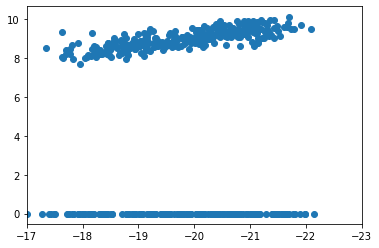

In [41]:
plt.scatter(rabsmag, xCG['LOGMH2'])
plt.gca().invert_xaxis()
plt.xlim(-17,-23)


In [31]:
xCG[np.where(rabsmag==0)]

ID,SDSS,OBJID,SPECOBJID,PLATEID,MJD,FIBERID,RA,DEC,Z_SDSS,LUMDIST,INCL,NUVR,R50KPC,LOGMSTAR,LOGMUST,CINDX,WEIGHT,LOGSFR_MPAJHU,LOGSFR_SED,LOGSFR_BEST,LOGSFR_ERR,FLAG_IRAS,LOGLIR_IRAS,IRCOL_IRAS,N2HA,O3HB,AGNCLASS,Z_PP04_N2,Z_PP04_O3N2,Z_MZR,FLAG_CO,XCO,XCO_A17,XCO_A17_ERR,ICO,ICO_ERR,ICO_COR,ICO_COR_ERR,LCO,LCO_ERR,LCO_COR,LCO_COR_ERR,RMS_CO,SN_CO,WCO,WCO_FLAG,Z_CO,WCO_TFR,WCO_TFR_ERR,LOGMH2,LOGMH2_ERR,LIM_LOGMH2,LOGMH2MS,FLAG_CO21,ICO21,ICO21_ERR,LCO21,LCO21_ERR,RMS_CO21,SN_CO21,WCO21,WCO21_FLAG,Z_CO21,FLAG_APEX,ICO_APEX,LCO_APEX,RMS_APEX,SN_APEX,WCO_APEX,ZCO_APEX
int32,bytes19,int64,int64,int16,int32,int16,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32
27167,J003921.66+142811.5,587724232100741195,0,418,51884,150,9.84028,14.46986,0.038019999861717224,167.56366,44.72357,4.48,1.6209953,10.372,9.20843,2.77,0.8002016,-0.9636899,-0.18055098,-0.7990457,0.35271347,0,0.0,0.0,-0.1307787,0.38306263,3,9.125353,8.56557,8.751667,2,4.35,3.1509695,1.197137,0.0,0.0,0.0,0.0,99582220.0,0.0,104773270.0,0.0,0.001172,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.518695,-1.8533051,2,0.0,--,56751584.0,inf,0.002041,0.0,245.54123,1,0.03802,0,0.0,0.0,0.0,0.0,0.0,0.0
56319,J080322.76+095745.8,587742061045678113,680837537526185984,2418,53794,88,120.84485,9.96273,0.034529998898506165,151.7926,74.23454,4.78,2.2553458,10.137,8.603742,2.53,0.6814768,-0.48323992,-0.66927254,-0.32636377,0.20047553,0,0.0,0.0,-0.43793955,--,0,8.695762,--,8.713528,1,4.35,3.7964392,1.4423681,0.392,0.081952654,0.42283794,0.1087995,130642750.0,29461184.0,140920200.0,36259864.0,0.001172,5.1772976,193.49092,2,0.03459257,0.0,0.0,8.72835,0.1883314,0.0,-1.4086504,1,0.282,0.108790316,29571928.0,11408296.0,0.00144,3.0313165,219.20564,3,0.03453,0,0.0,0.0,0.0,0.0,0.0,0.0
56612,J090307.74+134149.4,587744874791632941,685059776039616512,2433,53820,611,135.78226,13.69707,0.029030000790953636,127.09673,61.483612,5.07,1.3732994,10.268,9.275236,2.95,0.6598229,-1.5784799,-1.466061,-1.6318054,0.0,0,0.0,0.0,--,--,0,--,--,8.736576,2,4.35,3.3337765,1.2665902,0.0,0.0,0.0,0.0,64737348.0,0.0,68136100.0,0.0,0.001142,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.356314,-1.911686,2,0.0,--,--,--,0.001287,0.0,0.0,0,0.02903,0,0.0,0.0,0.0,0.0,0.0,0.0
14831,J100530.26+054019.4,587732701788307620,280294080007634944,995,52731,62,151.37611,5.67207,0.0443900004029274,196.54913,66.18843,4.25,4.3680806,11.212,9.205663,2.72,0.22256462,0.5717201,0.35471877,0.06622556,0.1251396,0,0.0,0.0,-0.022229372,-0.101503275,2,9.325493,8.755367,8.739204,1,4.35,3.1076987,1.1806973,1.65,0.24937317,1.9150776,0.40778953,913281300.0,160203780.0,1060002750.0,225713060.0,0.002194,7.798741,431.11743,1,0.044463113,397.74338,69.06062,9.517746,0.17757602,0.0,-1.694254,0,0.0,--,0.0,--,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5204,J102750.83+023634.0,587728309097267301,142088085788688384,504,52316,481,156.96182,2.60946,0.02848999947309494,124.68252,38.30521,4.7,1.7943616,10.402,9.135617,2.5,0.6425136,-0.4593699,0.1928262,-0.6478552,0.19616535,0,0.0,0.0,-0.007828813,0.024095967,3,9.354185,8.719784,8.755466,2,4.35,3.1065457,1.1802592,0.0,0.0,0.0,0.0,65772760.0,0.0,72231940.0,0.0,0.001205,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.351007,-2.0509934,2,0.0,--,--,--,0.002029,0.0,0.0,0,0.02849,0,0.0,0.0,0.0,0.0,0.0,0.0
15155,J104054.93+055930.8,587732577236156445,0,1000,52643,136,160.22997,5.99141,0.027729999274015427,121.28792,--,--,--,10.189,--,--,0.6814768,-1.7056956,0.33262116,0.5718348,0.029030805,0,0.0,0.0,-0.28946245,-0.0696605,2,8.880204,8.659663,8.723179,1,4.35,5.256994,1.9972715,5.54,0.47418997,8.096472,1.3982846,1186607100.0,148434750.

In [33]:
mascot = Table.read(manga_folder + 'MASCOT.fits', format='fits')

In [45]:
np.max(nsa['ELPETRO_ABSMAG'])

inf